In [6]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import xml.etree.ElementTree as ET

Image.MAX_IMAGE_PIXELS = None

In [10]:
images = glob.glob('data/*.jpg')
images

['data/D-1M05-3.jpg',
 'data/D-1M02-4.jpg',
 'data/D-1M03-6.jpg',
 'data/D-1M03-5.jpg',
 'data/D-1M02-6.jpg',
 'data/D-1M03-2.jpg',
 'data/D-1M05-4.jpg',
 'data/D-1M04-1.jpg',
 'data/D-1M05-2.jpg',
 'data/D-1M03-3.jpg',
 'data/D-1M01-6.jpg',
 'data/D-1M05-5.jpg',
 'data/D-1M05-6.jpg',
 'data/D-1M05-1.jpg',
 'data/D-1M01-5.jpg',
 'data/D-1M03-1.jpg',
 'data/D-1M02-2.jpg',
 'data/D-1M01-4.jpg',
 'data/D-1M04-4.jpg',
 'data/D-1M06-4.jpg',
 'data/D-1M06-1.jpg',
 'data/D-1M03-4.jpg',
 'data/D-1M01-3.jpg',
 'data/D-1M02-1.jpg',
 'data/D-1M04-2.jpg',
 'data/D-1M04-5.jpg',
 'data/D-1M01-2.jpg',
 'data/D-1M04-3.jpg',
 'data/D-1M02-5.jpg',
 'data/D-1M06-3.jpg',
 'data/D-1M06-2.jpg',
 'data/D-1M04-6.jpg',
 'data/D-1M02-3.jpg']

In [8]:
annots = glob.glob('data/*.xml')
len(annots)

33

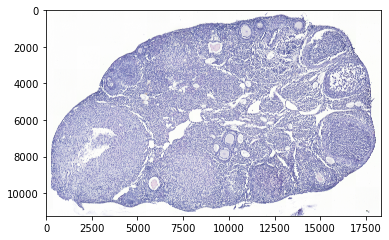

In [9]:
im = Image.open(images[0])
plt.imshow(im)

In [11]:
def xml_read(annot):
    tree = ET.parse(annot)
    root = tree.getroot()
    objects =root.findall('object')
    filename = tree.findtext('filename')
    return (filename, objects)

In [12]:
def bounding_boxes(image):
    annot_path = image.split('.')[-2]+'.xml'
    filename, objects = xml_read(annot_path)
    bboxes = []
    for o in objects:
        bndbox = o.find('bndbox')
        xmin = int(bndbox.find('xmin').text)
        ymin = int(bndbox.find('ymin').text)
        xmax = int(bndbox.find('xmax').text)
        ymax = int(bndbox.find('ymax').text)
        cat = o.find('name').text
        bboxes.append([cat, (xmin,ymin,xmax,ymax)])
    return filename, bboxes

In [13]:
filename, bboxes = bounding_boxes(images[2])
print(filename)
bboxes

D-1M03-6.jpg


[['Negative', (13022, 4480, 13925, 5430)],
 ['Primordial', (7443, 9471, 7657, 9648)],
 ['Negative', (5262, 6223, 5988, 6958)],
 ['Negative', (7934, 7895, 8734, 8517)],
 ['Negative', (9867, 5951, 10793, 6838)],
 ['Negative', (7914, 1779, 10542, 4341)],
 ['Primary', (1913, 7627, 2150, 7822)],
 ['Secondary', (7795, 8560, 8721, 9447)],
 ['Negative', (8893, 9517, 9110, 9663)],
 ['Primary', (11586, 8047, 11969, 8491)],
 ['Negative', (10219, 7617, 10441, 7897)],
 ['Negative', (5500, 3342, 7755, 5983)],
 ['Negative', (6923, 9012, 7558, 9894)],
 ['Negative', (7353, 6977, 8153, 7599)],
 ['Tertiary', (15547, 4973, 17646, 7084)],
 ['Negative', (11413, 2702, 11592, 2889)],
 ['Negative', (9903, 6897, 10657, 7538)],
 ['Primordial', (1635, 7201, 1860, 7388)],
 ['Negative', (11043, 7069, 11426, 7513)],
 ['Primordial', (9476, 9061, 9616, 9211)],
 ['Tertiary', (298, 3735, 2670, 6698)],
 ['Negative', (7884, 9505, 8168, 9715)],
 ['Negative', (14582, 6764, 16962, 9043)],
 ['Negative', (11065, 7589, 11504, 8

In [17]:
def im_crop(image, bbox, filename):
    im = Image.open(image)
    im_crop = im.crop(bbox[1])
    os.makedirs(os.path.join("data", "split", bbox[0]), exist_ok=True)
    im_crop.save('data/split/{}/{}-{}-xmin{}-ymin{}-xmax{}-ymax{}.jpg'.format(
        bbox[0],
        filename.split('.')[0],
        bbox[0],
        str(bbox[1][0]),
        str(bbox[1][1]),
        str(bbox[1][2]),
        str(bbox[1][3]),)
    )

In [ ]:
images = glob.glob('data/*.jpg')
len(images)

In [18]:
for image in images:
    filename, bboxes = bounding_boxes(image)
    for bbox in bboxes:
        im_crop(image, bbox, filename)
    

Maximum supported image dimension is 65500 pixels


OSError: encoder error -2 when writing image file